# Exploratory analysis of the census income data set

# read the data


read_csv has all kinds of important tuning parameters which can make the reading and the saving of the data more efficient

In [5]:
import pandas as pd 
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)

In [6]:
len(df)

32561

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

# Explore the data

# Check how many classes do we have and if the data is  imbalanced 

In [8]:
df.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

In [9]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

# View a few rows of the data

In [10]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country target  
0          2174             0              40   United-States  <=50K  
1             0             0              13   United-States  <=50K  
2             0             0              40   United-States  <=50K  
3             0             0              40   United-States  <=50K  
4             0             0              40            Cuba  <=50K

# Some statistics for the numerical variables - if you like numbers

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe(include='all')

age workclass        fnlwgt education  education-num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital-status       occupation relationship    race    sex  \
count                 32561            32561        32561   32561  32561   
unique                    7               15            6       5      2   
top      Married-civ-spouse   Prof-specialty      Husband   White   Male   
freq                  14976             4140        13193   27816  21790   
mean                    NaN              NaN          NaN     NaN    NaN   
std                     NaN              NaN          NaN     NaN    NaN   
min                     NaN              NaN          NaN     NaN    NaN   
25%                     NaN              NaN          NaN     NaN    NaN   
50%                     NaN              NaN          NaN     NaN    NaN   
75%                     NaN              NaN          NaN     NaN    NaN   
max                     NaN              NaN          NaN     NaN    NaN   

        capital-gain  capital-loss  hours-per-week  native-country target  
count   32561.000000  32561.000000    32561.000000           32561  32561  
unique           NaN           NaN             NaN              42      2  
top              NaN           NaN             NaN   United-States  <=50K  
freq             NaN           NaN             NaN           29170  24720  
mean     1077.648844     87.303830       40.437456             NaN    NaN  
std      7385.292085    402.960219       12.347429             NaN    NaN  
min         0.000000      0.000000        1.000000             NaN    NaN  
25%         0.000000      0.000000       40.000000             NaN    NaN  
50%         0.000000      0.000000       40.000000             NaN    NaN  
75%         0.000000      0.000000       45.000000             NaN    NaN  
max     99999.000000   4356.000000       99.000000             NaN    NaN

In [13]:
numerical_columns = df.describe().columns
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

# Some boxplots - if you like visualizations

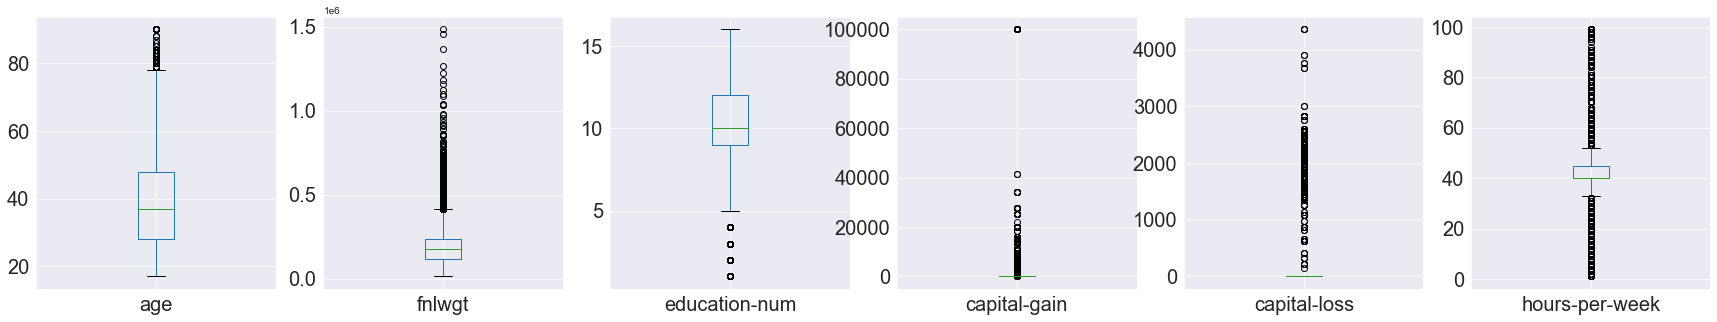

In [14]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(30,5))
for i,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),i+1)
    df[[col]].boxplot(fontsize=20)


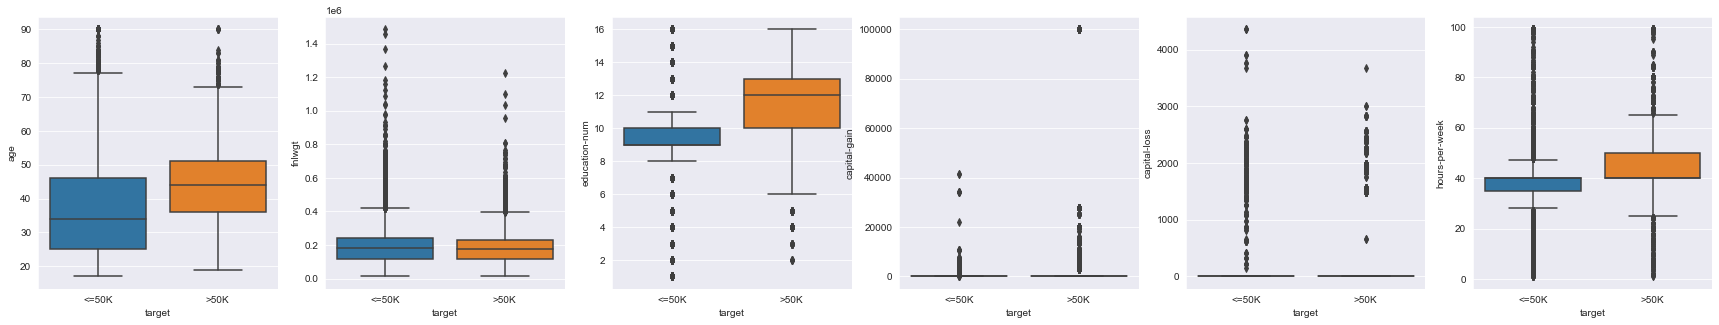

In [15]:
%matplotlib inline
plt.figure(figsize=(30,5))
for i,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),i+1)
    sns.boxplot(df['target'],df[col])

# View the most frequent categories for the categorical features - notice missing values (?)


In [16]:
! pip install bubble_plot



In [17]:
from bubble_plot.utils import describe_categorical_values

describe_categorical_values(df, non_interesting_columns=numerical_columns, num_categories=6)

0                      1  \
workclass                   Private: 70%   Self-emp-not-inc: 8%   
education                   HS-grad: 32%      Some-college: 22%   
marital-status   Married-civ-spouse: 46%     Never-married: 33%   
occupation           Prof-specialty: 13%      Craft-repair: 13%   
relationship                Husband: 41%     Not-in-family: 26%   
race                          White: 85%             Black: 10%   
sex                            Male: 67%            Female: 33%   
native-country        United-States: 90%             Mexico: 2%   
target                        <=50K: 76%              >50K: 24%   

                                      2                        3  \
workclass                 Local-gov: 6%                    ?: 6%   
education                Bachelors: 16%              Masters: 5%   
marital-status            Divorced: 14%            Separated: 3%   
occupation         Exec-managerial: 12%        Adm-clerical: 12%   
relationship             Own-child: 16%           Unmarried: 11%   
race             Asian-Pac-Islander: 3%   Amer-Indian-Eskimo: 1%   
sex                                None                     None   
native-country                    ?: 2%          Philippines: 1%   
target                             None                     None   

                             4                           5  
workclass        State-gov: 4%            Self-emp-inc: 3%  
education        Assoc-voc: 4%                    11th: 4%  
marital-status     Widowed: 3%   Married-spouse-absent: 1%  
occupation          Sales: 11%          Other-service: 10%  
relationship          Wife: 5%          Other-relative: 3%  
race                 Other: 1%                        None  
sex                       None                        None  
native-country     Germany: 0%                  Canada: 0%  
target                    None                        None

# Visualize the distributions of the numerical variables per class using KDE (Kernel Density Estimation) plots

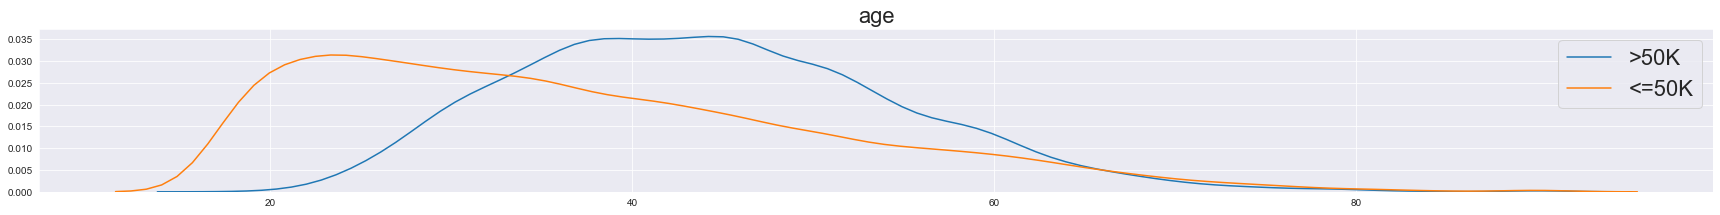

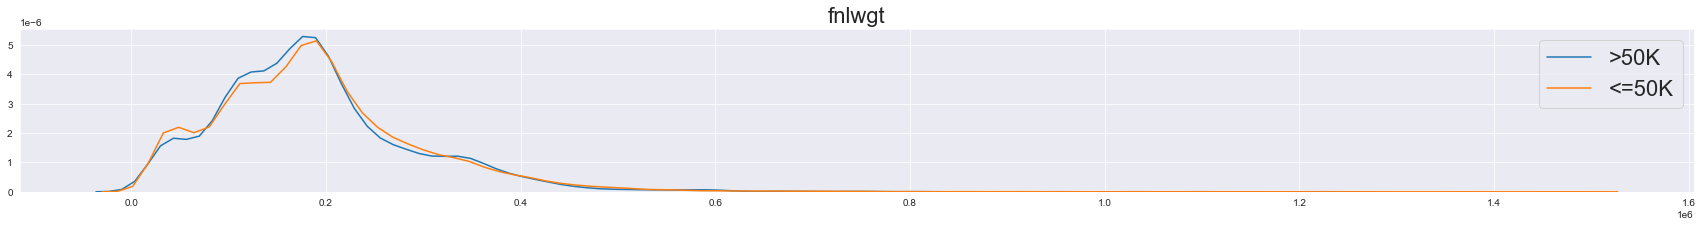

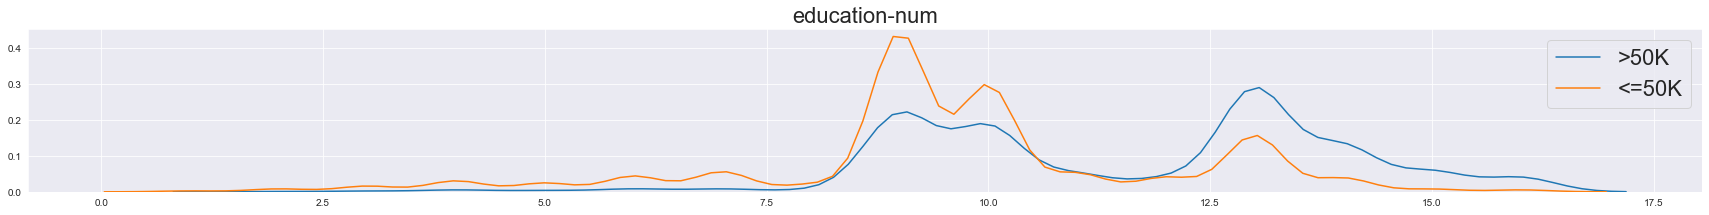

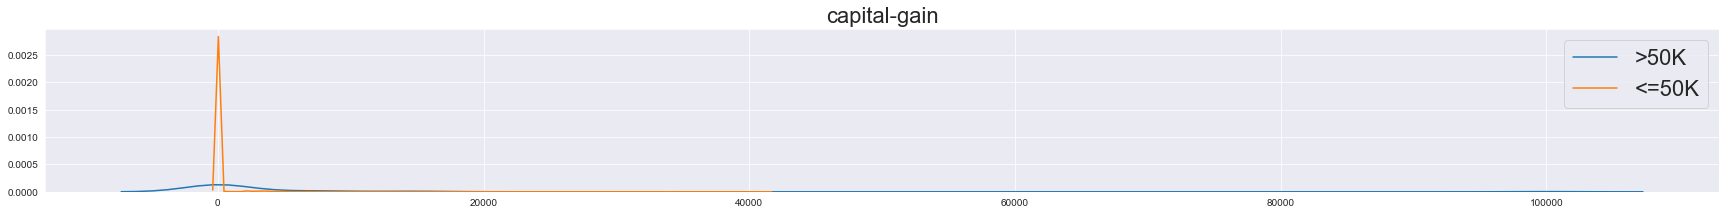

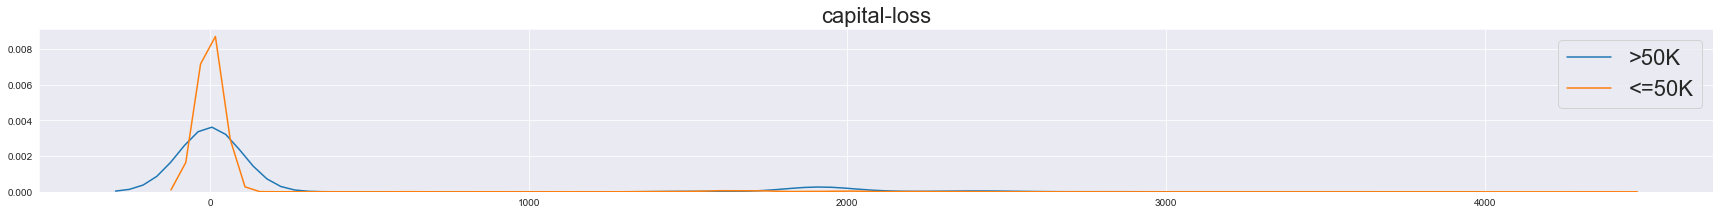

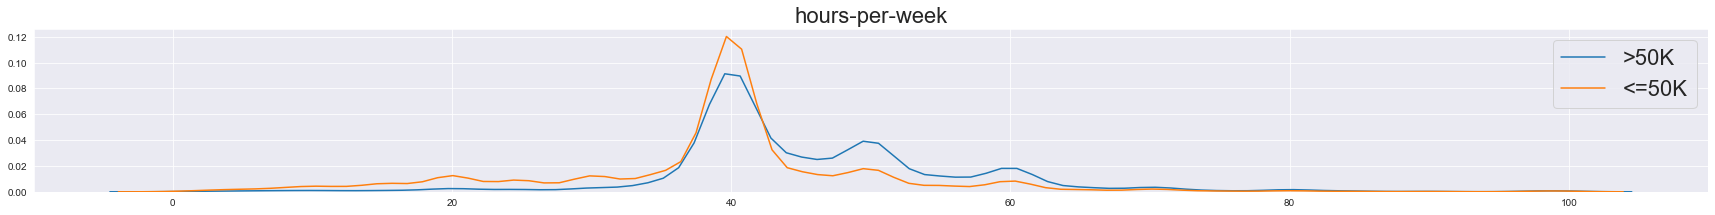

In [18]:
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline
for col in numerical_columns:
    plt.figure(figsize=(30,3))
    sns.kdeplot(df.loc[df.target=='>50K',col], label='>50K')
    sns.kdeplot(df.loc[df.target=='<=50K',col], label='<=50K')
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

KDE plots doesn't always work so great, especially for integers - let's try bubble plot!

# Bubble plot

# Look at one variable vs. the target

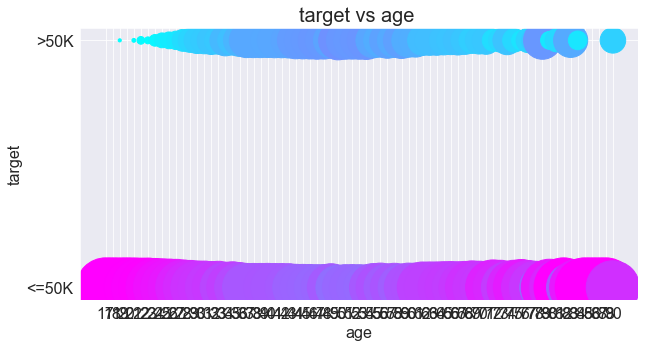

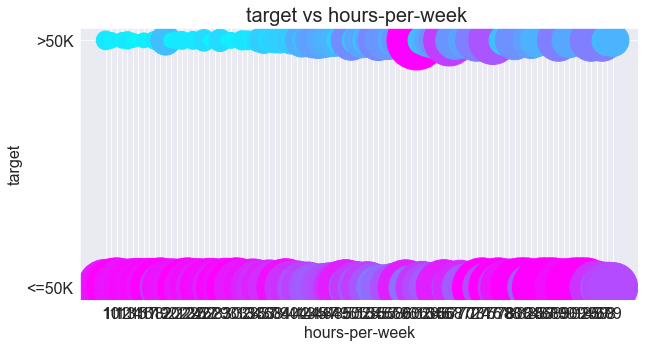

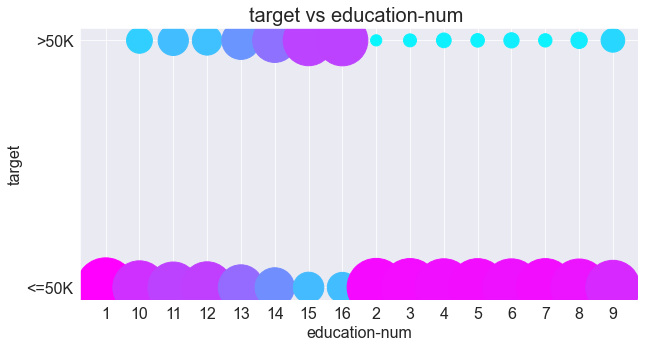

In [19]:
%matplotlib inline
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(df,'age','target', normalization_by_all=False)
bubble_plot(df,'hours-per-week','target', normalization_by_all=False)
bubble_plot(df,'education-num','target', normalization_by_all=False)


# Look at two variables vs the target (the color simbols the target ratio)

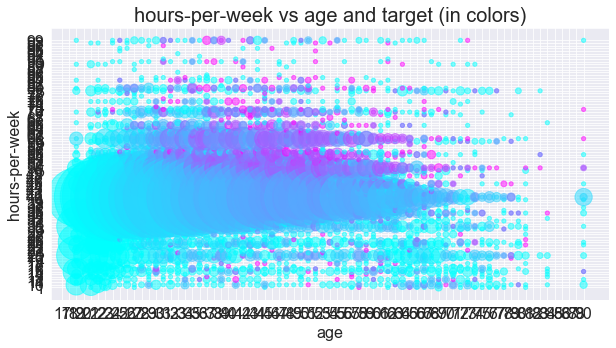

In [20]:
bubble_plot(df, x='age', y='hours-per-week', z_boolean='target', maximal_bubble_size=8000)

# Impute missing values for categorical columns with the most common values


**How to deal with missing values?**

(1) missing at random - imputation - using common values or estimation of the value using regression methods

(2) missing not at random - treat missing value as a separate indicator variable

In [21]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']
for col in categorical_columns:
    df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]

# Remove infrequent categorical values

In [22]:
from bubble_plot.utils import remove_infrequent_values

df = remove_infrequent_values(df, categorical_columns)

removing columns: 
 Without-pay     14
 Never-worked     7
Name: workclass, dtype: int64 

removing columns: 
 Armed-Forces    9
Name: occupation, dtype: int64 

removing columns: 
 Trinadad&Tobago               19
 Cambodia                      19
 Thailand                      18
 Laos                          18
 Yugoslavia                    16
 Outlying-US(Guam-USVI-etc)    14
 Hungary                       13
 Honduras                      13
 Scotland                      12
 Holand-Netherlands             1
Name: native-country, dtype: int64 



# Convert categorical variables to dummy variables

In [23]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
y = df.target==">50K"
features = [x for x in df.columns if x!='target']
X = pd.get_dummies(df[features])

In [24]:
X.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  native-country_ Portugal  \
0                        0  ...                         0   
1                        0  ...                         0   
2                        0  ...                         0   
3                        0  ...                         0   
4                        0  ...                         0   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  

[5 rows x 108 columns]

# Split to train and test data - using StratifiedKFold - to keep the target distribution in the data

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
train_index, test_index = list(skf.split(X, y))[0]
train, test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]


In [26]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

In [27]:
pd.Series(y_train).value_counts()/len(y_train)

False    0.759214
True     0.240786
Name: target, dtype: float64

In [28]:
pd.Series(y_test).value_counts()/len(y_test)

False    0.759097
True     0.240903
Name: target, dtype: float64

# Check correlation between the variables and between the variables and the target

## Important specifically for Logistic regression where correlation between variables can contribute to a numerically unstable solution 

var_1                   var_2     value
0                          age                  target  0.234037
1           workclass_ Private  workclass_ Federal-gov -0.264369
2              education_ 10th           education-num -0.272428
3           education_ 5th-6th           education-num -0.279766
4      workclass_ Self-emp-inc      workclass_ Private -0.285747
5         workclass_ State-gov      workclass_ Private -0.309064
6                education-num                  target  0.335154
7           workclass_ Private            workclass_ ? -0.370780
8           workclass_ Private    workclass_ Local-gov -0.397547
9  workclass_ Self-emp-not-inc      workclass_ Private -0.441289

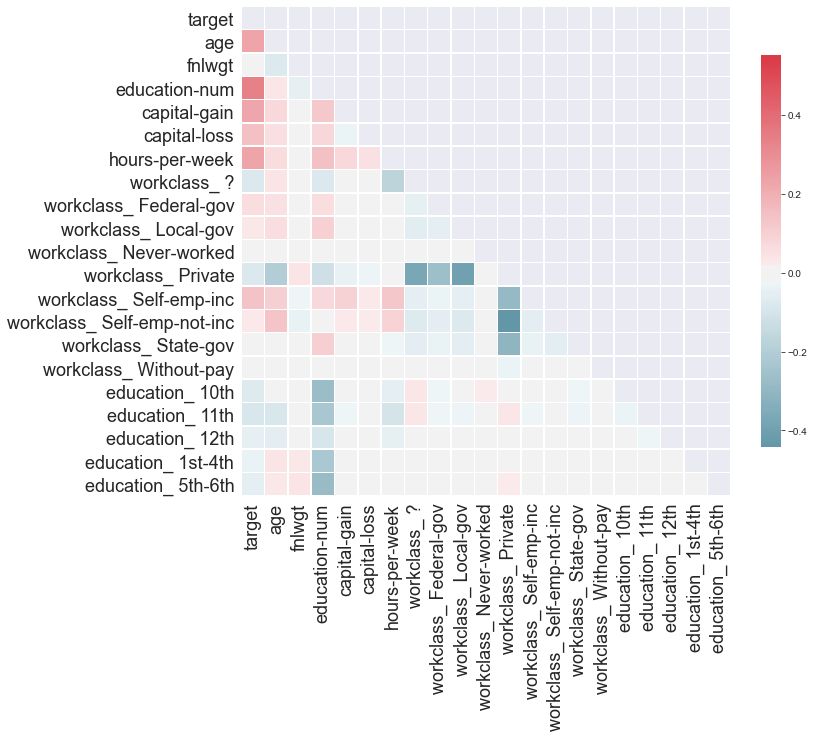

In [29]:
import numpy as np
from bubble_plot.utils import get_most_correlated_variables, plot_correlation_matrix

if 'target' not in X:
    X['target'] = y
features2 = ['target'] + X.columns[:20].tolist()
plot_correlation_matrix(X, features2)

var_1                 var_2     value
0     education_ Doctorate         education-num  0.260786
1          education_ 10th         education-num -0.272428
2       education_ 5th-6th         education-num -0.279766
3       education_ HS-grad         education-num -0.289817
4       education_ HS-grad  education_ Bachelors -0.306098
5            education-num                target  0.335154
6       education_ 7th-8th         education-num -0.336268
7       education_ Masters         education-num  0.360101
8  education_ Some-college    education_ HS-grad -0.370598
9     education_ Bachelors         education-num  0.503435

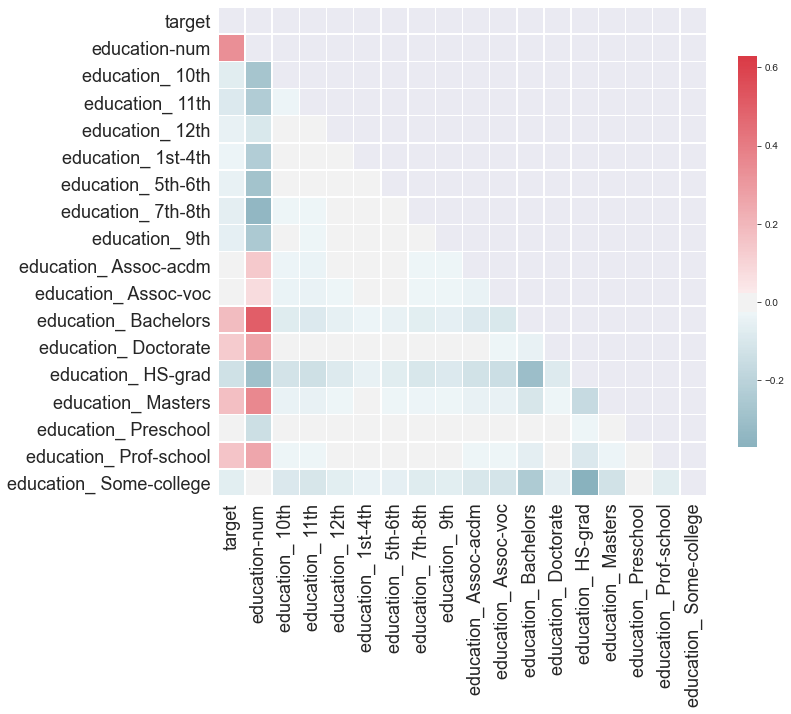

In [30]:
features2 =['target']+[x for x in X.columns if x.startswith('education') ]
plot_correlation_matrix(X, features2)

var_1                               var_2  \
0  marital-status_ Married-civ-spouse            marital-status_ Divorced   
1             relationship_ Own-child  marital-status_ Married-civ-spouse   
2               relationship_ Husband                              target   
3  marital-status_ Married-civ-spouse                              target   
4         relationship_ Not-in-family               relationship_ Husband   
5             relationship_ Own-child       marital-status_ Never-married   
6         relationship_ Not-in-family  marital-status_ Married-civ-spouse   
7               relationship_ Husband       marital-status_ Never-married   
8       marital-status_ Never-married  marital-status_ Married-civ-spouse   
9               relationship_ Husband  marital-status_ Married-civ-spouse   

      value  
0 -0.366837  
1 -0.380070  
2  0.401035  
3  0.444696  
4 -0.482936  
5  0.509226  
6 -0.537588  
7 -0.576730  
8 -0.644866  
9  0.893210

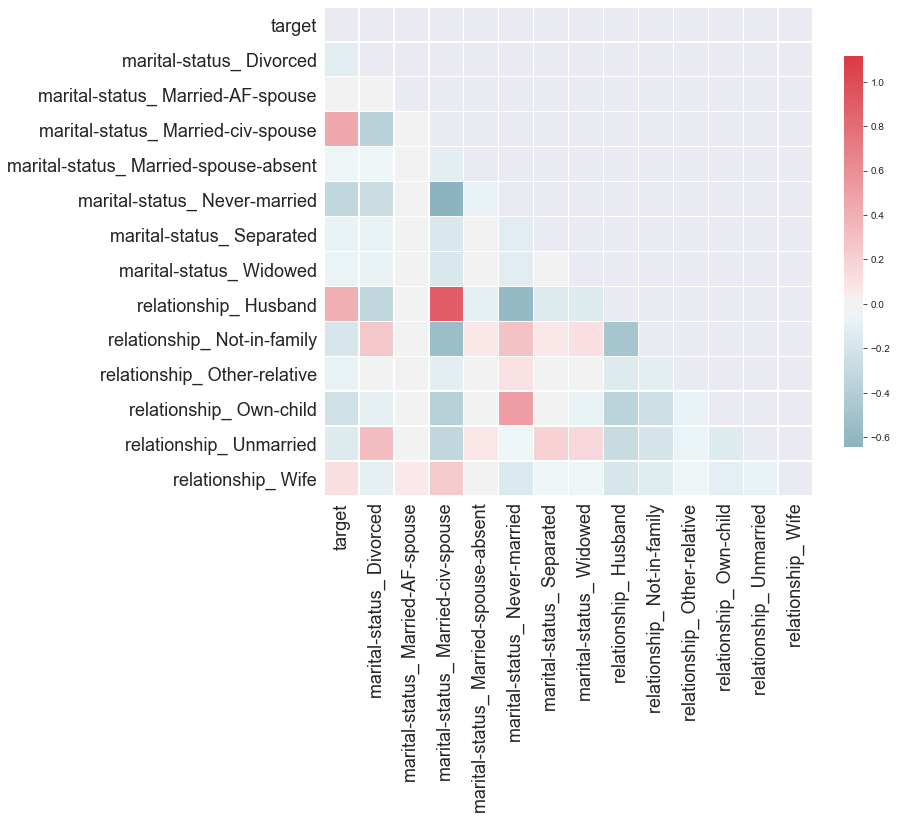

In [31]:
features2 =['target']+[x for x in X.columns if x.startswith('relationship_') or x.startswith('marital')]
plot_correlation_matrix(X, features2)

# Find features which are highly correlated to each other

In [32]:
if 'target' in X:
    X = X.drop('target', axis=1)
corr = X.corr()
most_correlated_variables = get_most_correlated_variables(corr, num_pairs=10)

In [33]:
most_correlated_variables

var_1                               var_2     value
0  marital-status_ Never-married                                 age -0.534359
1    relationship_ Not-in-family  marital-status_ Married-civ-spouse -0.537588
2          relationship_ Husband       marital-status_ Never-married -0.576730
3                    sex_ Female               relationship_ Husband -0.580135
4                      sex_ Male               relationship_ Husband  0.580135
5  marital-status_ Never-married  marital-status_ Married-civ-spouse -0.644866
6                    race_ White                         race_ Black -0.788747
7          relationship_ Husband  marital-status_ Married-civ-spouse  0.893210
8                  occupation_ ?                        workclass_ ?  0.997985
9                      sex_ Male                         sex_ Female -1.000000

In [34]:
most_correlated_variables.tail(5).var_2.values

array(['marital-status_ Married-civ-spouse', 'race_ Black',
       'marital-status_ Married-civ-spouse', 'workclass_ ?',
       'sex_ Female'], dtype=object)

# Find features which are highly correlated with the target

In [35]:
if 'target' not in X:
    X['target'] = y
corr = X.corr()
corr_with_target = corr[['target']].drop('target', axis=0)
corr_with_target['abs_value'] = corr_with_target.abs()
corr_with_target.sort_values(by='abs_value').tail(10).drop('abs_value',axis=1)

target
sex_ Male                           0.215980
sex_ Female                        -0.215980
capital-gain                        0.223329
relationship_ Own-child            -0.228532
hours-per-week                      0.229689
age                                 0.234037
marital-status_ Never-married      -0.318440
education-num                       0.335154
relationship_ Husband               0.401035
marital-status_ Married-civ-spouse  0.444696

In [36]:
best_features_by_correlation = corr_with_target[corr_with_target.abs_value>0.05].index.values

In [37]:
len(best_features_by_correlation)

43

# Dimension reduction with PCA 
Data is projected into a new space where the new transformed features has no mutual correlation.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=train.shape[1])
train_pca = pca.fit_transform(train, )
test_pca = pca.transform(test)


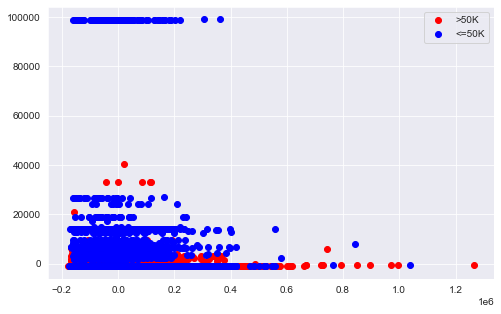

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(train_pca[(y_train==0).values,0], train_pca[(y_train==0).values,1], color='r', label='>50K')
plt.scatter(train_pca[(y_train==1).values,0], train_pca[(y_train==1).values,1], color='b', label='<=50K')
plt.legend()

# Plot the Explained variance in each component

<Figure size 2160x360 with 0 Axes>

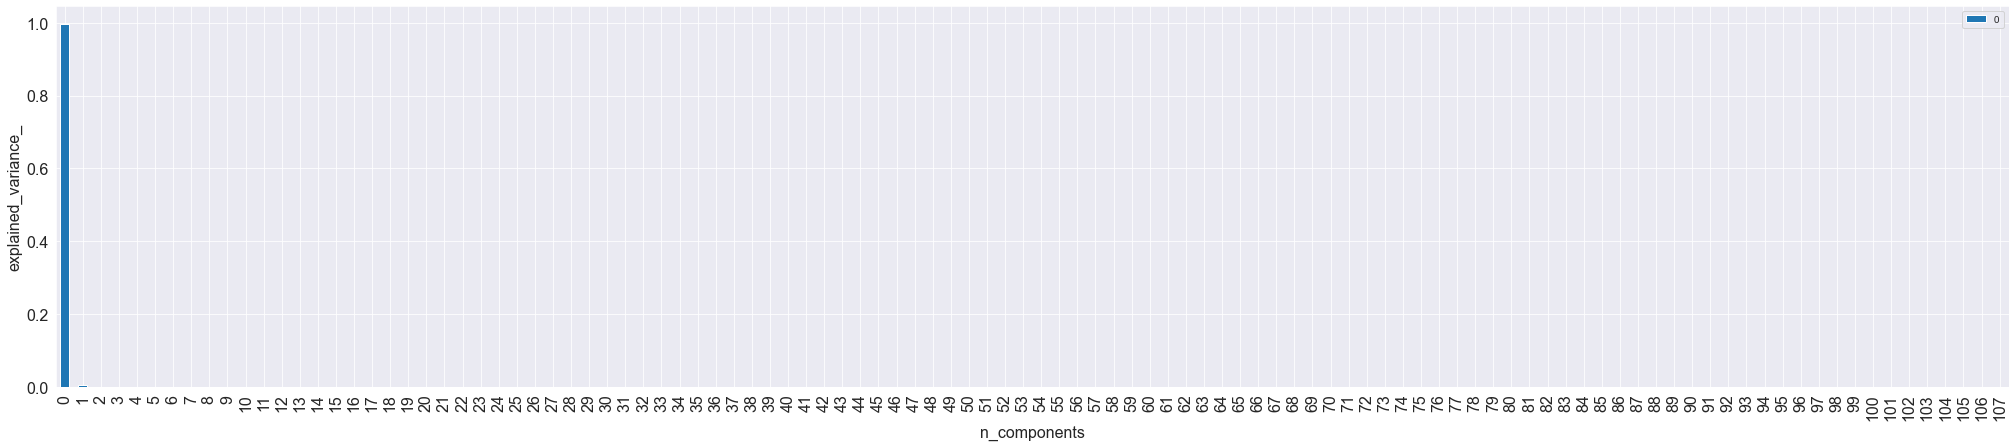

In [40]:
plt.figure(figsize=(30,5))
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(log=False, figsize=(35,7), fontsize=16)
plt.xlabel('n_components',fontsize=16)
plt.ylabel('explained_variance_', fontsize=16);

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


<Figure size 2160x360 with 0 Axes>

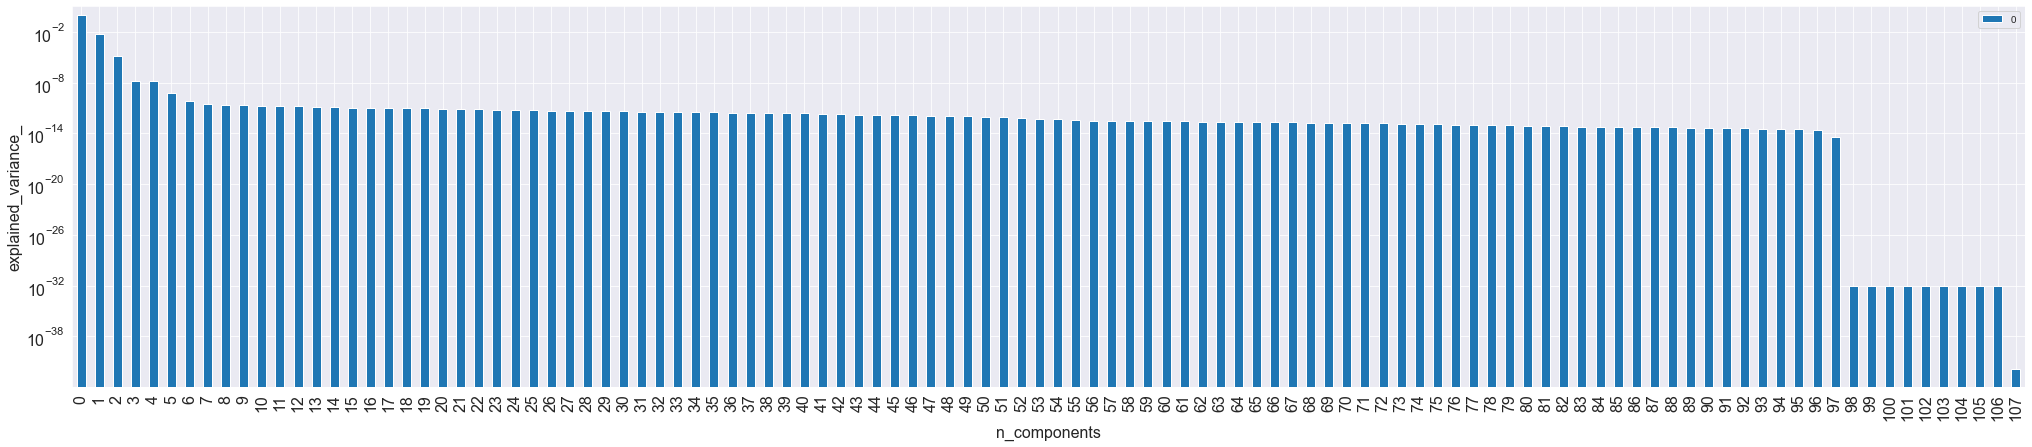

In [41]:
plt.figure(figsize=(30,5))
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(log=True, figsize=(35,7), fontsize=16)
plt.xlabel('n_components',fontsize=16)
plt.ylabel('explained_variance_', fontsize=16);
plt.ylim([0,10]);

# Train a Logistic regression model and evaluate its results

              precision    recall  f1-score   support

       False       0.78      0.60      0.68      4944
        True       0.27      0.48      0.35      1569

    accuracy                           0.57      6513
   macro avg       0.53      0.54      0.51      6513
weighted avg       0.66      0.57      0.60      6513



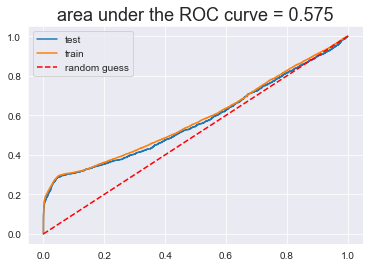

In [42]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.loc[fpr_tpr.dist.argmin(), 'thresholds']


def get_model_results(model, train, test, y_train, y_test):
    probabilities = model.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {:.3f}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()

model = LogisticRegression()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with normalization

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

       False       0.94      0.81      0.87      4944
        True       0.59      0.84      0.69      1569

    accuracy                           0.82      6513
   macro avg       0.76      0.83      0.78      6513
weighted avg       0.86      0.82      0.83      6513



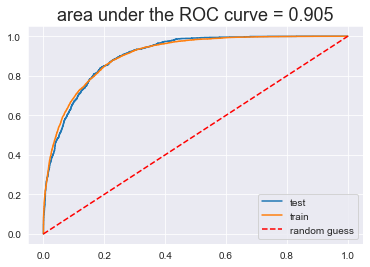

In [43]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

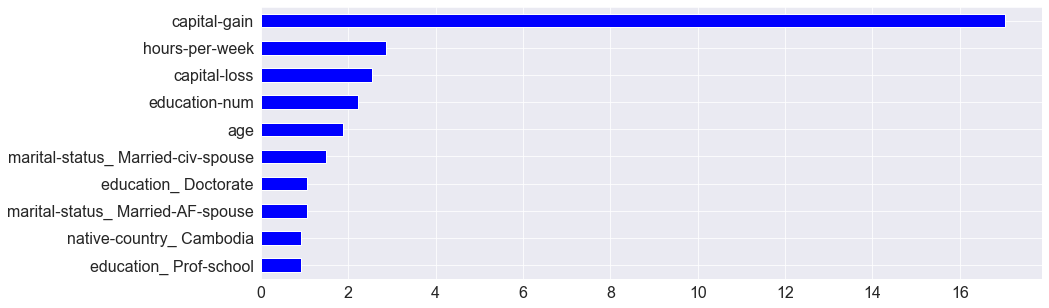

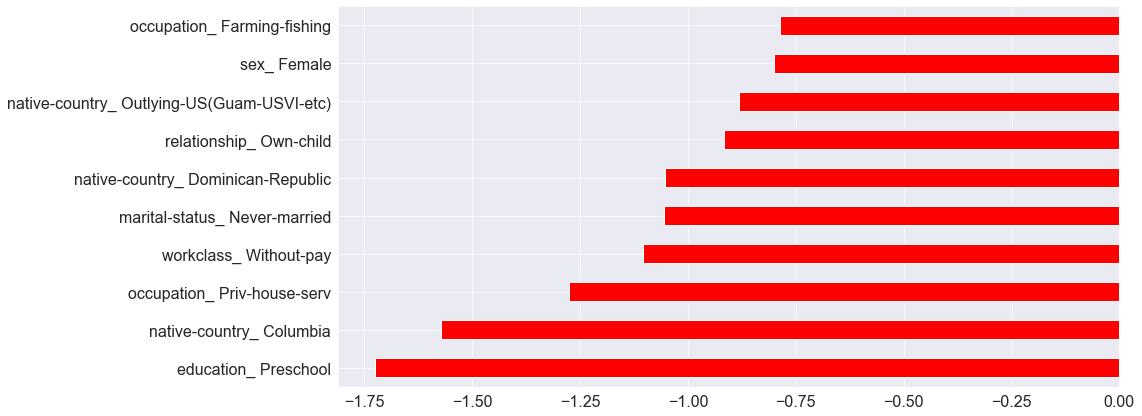

In [44]:
feature_importance = pd.Series(index=train.columns , data= model.named_steps['logisticregression'].coef_[0])
feature_importance = feature_importance.sort_values()
plt.figure(figsize=(14,5))
feature_importance.tail(10).plot.barh(fontsize=16,color='b' )
plt.figure(figsize=(14,5))
feature_importance.head(10).plot.barh(fontsize=16, figsize=(14,7), color='r')

# Logistic regression with PCA

              precision    recall  f1-score   support

       False       0.88      0.69      0.78      4944
        True       0.42      0.71      0.53      1569

    accuracy                           0.70      6513
   macro avg       0.65      0.70      0.65      6513
weighted avg       0.77      0.70      0.72      6513



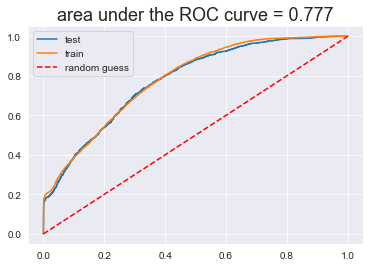

In [45]:
model = make_pipeline(PCA(n_components=30,whiten=False),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with Polynomial features

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

       False       0.94      0.81      0.87      4944
        True       0.59      0.83      0.69      1569

    accuracy                           0.82      6513
   macro avg       0.76      0.82      0.78      6513
weighted avg       0.85      0.82      0.83      6513



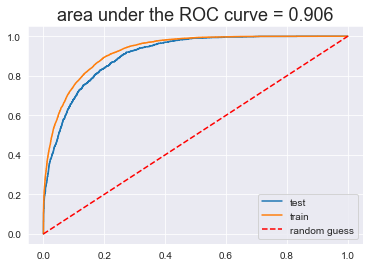

In [46]:
model = make_pipeline(PolynomialFeatures(),MinMaxScaler(), LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with Polynomial features only for the numerical features

In [47]:
poly = PolynomialFeatures(2)
train_poly_features = poly.fit_transform(train[numerical_columns])
test_poly_features = poly.transform(test[numerical_columns])
train_with_poly_features = pd.concat([train.reset_index(drop=True),pd.DataFrame(train_poly_features)],axis=1)
test_with_poly_features = pd.concat([test.reset_index(drop=True),pd.DataFrame(test_poly_features)],axis=1)

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

       False       0.94      0.82      0.88      4944
        True       0.60      0.83      0.70      1569

    accuracy                           0.83      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.83      0.83      6513



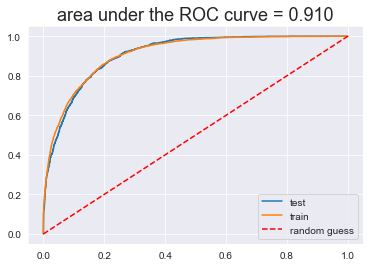

In [48]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train_with_poly_features , y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

# Explore the logistic regression coefficients

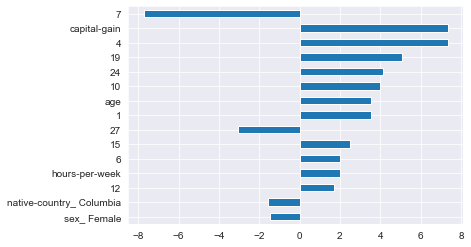

In [49]:
feature_importance=pd.DataFrame(index=train_with_poly_features.columns, 
                             data=model.named_steps['logisticregression'].coef_[0])
feature_importance['abs_value']=feature_importance.abs()
feature_importance.sort_values(by='abs_value')[0].tail(15).plot.barh()

# Hyper-parameter tuning for logistic regression

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

              precision    recall  f1-score   support

       False       0.94      0.81      0.87      4944
        True       0.59      0.84      0.69      1569

    accuracy                           0.82      6513
   macro avg       0.76      0.83      0.78      6513
weighted avg       0.86      0.82      0.83      6513

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}


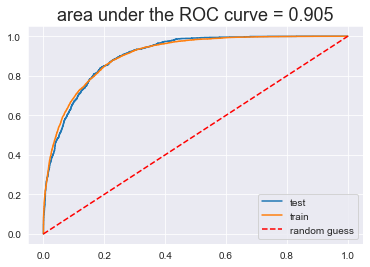

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {#'logisticregression__penalty': ['l2','l1'], 'logisticregression__C': [1, 10, 100, 1000],
          'logisticregression__penalty': ['l2'], 'logisticregression__C': [1,],
#                  'solver': ['newton-cg'],
#                  'logisticregression__fit_intercept': [False, True]
         }
gscv = GridSearchCV(make_pipeline(MinMaxScaler(), LogisticRegression()), params, scoring='roc_auc', cv=3)
gscv.fit(train, y_train)
get_model_results(gscv, train, test, y_train, y_test)
print(gscv.best_params_)

# Decision tree classifier

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.76      1.00      0.86      4944
        True       0.00      0.00      0.00      1569

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.58      0.76      0.66      6513



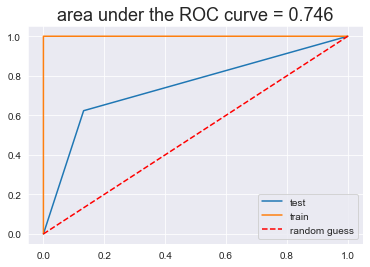

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None) 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# min_samples_split=10 to reduce overfitting

              precision    recall  f1-score   support

       False       0.91      0.80      0.85      4944
        True       0.54      0.74      0.62      1569

    accuracy                           0.79      6513
   macro avg       0.72      0.77      0.74      6513
weighted avg       0.82      0.79      0.80      6513



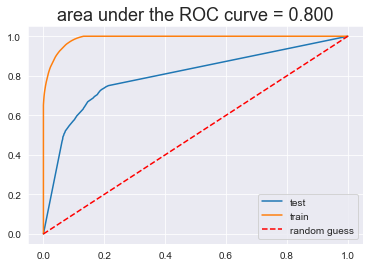

In [55]:
model = DecisionTreeClassifier(min_samples_split=10) 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# min_samples_split=50 to reduce overfitting

              precision    recall  f1-score   support

       False       0.93      0.79      0.86      4944
        True       0.55      0.81      0.66      1569

    accuracy                           0.80      6513
   macro avg       0.74      0.80      0.76      6513
weighted avg       0.84      0.80      0.81      6513



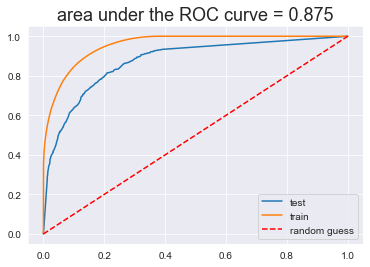

In [56]:
model = DecisionTreeClassifier(min_samples_split=50) 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Random forest classifier

              precision    recall  f1-score   support

       False       0.93      0.79      0.85      4944
        True       0.55      0.81      0.66      1569

    accuracy                           0.79      6513
   macro avg       0.74      0.80      0.75      6513
weighted avg       0.84      0.79      0.81      6513



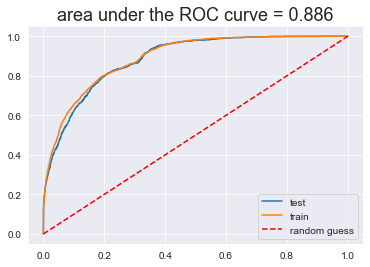

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, n_estimators=100) # max_depth=4
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# plot one of the random forest trees

In [58]:
from sklearn import tree
from os import system

tree_dot_path = "models/tree1.dot"
tree_png_path = "models/tree1.png"
dotfile = open(tree_dot_path, 'w')
tree.export_graphviz(model.estimators_[10], out_file = dotfile, 
                     feature_names = train.columns, 
                     filled=True)
dotfile.close()
system("dot -Tpng {tree_dot_path} -o {tree_png_path}".format(
        tree_dot_path=tree_dot_path, tree_png_path=tree_png_path));

<img src=models/tree1.png width="1700">

# XGBoost - Extreme gradient boosted trees
https://github.com/dmlc/xgboost

              precision    recall  f1-score   support

       False       0.95      0.83      0.89      4944
        True       0.62      0.86      0.72      1569

    accuracy                           0.84      6513
   macro avg       0.78      0.84      0.80      6513
weighted avg       0.87      0.84      0.84      6513



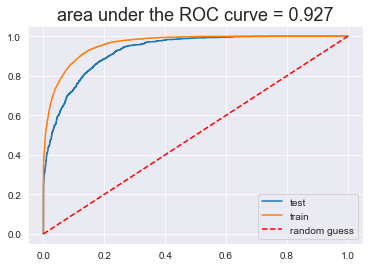

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)



# Feature importnace for xgboost

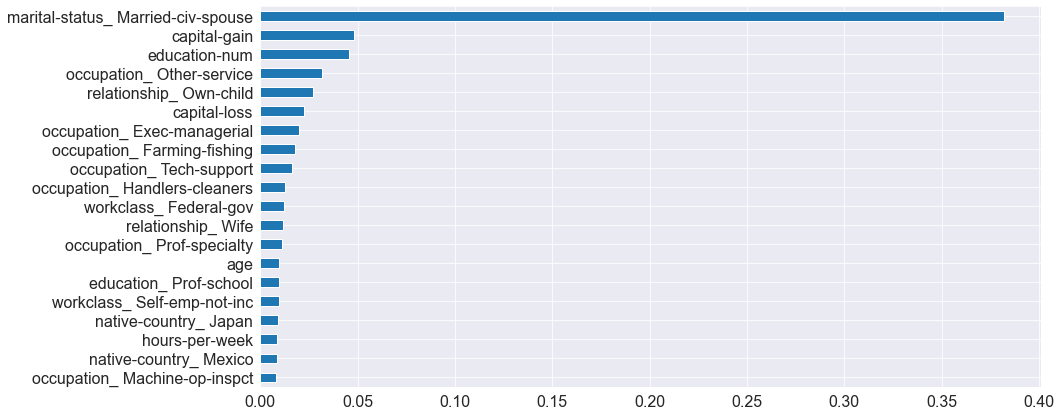

In [60]:
import xgboost as xgb
feature_importance = pd.Series(index=train.columns , data= model.feature_importances_)
feature_importance = feature_importance.sort_values()
feature_importance.tail(20).plot.barh(fontsize=16, figsize=(14,7))

# XGBoost with polynomial features

              precision    recall  f1-score   support

       False       0.95      0.81      0.88      4944
        True       0.60      0.87      0.71      1569

    accuracy                           0.83      6513
   macro avg       0.77      0.84      0.79      6513
weighted avg       0.87      0.83      0.84      6513



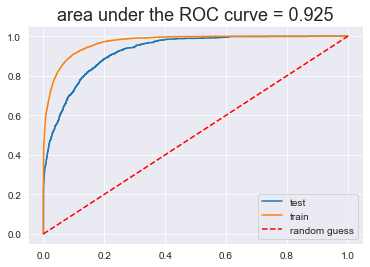

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_with_poly_features, y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

# XGBoost classifier with the 15 strongest features

              precision    recall  f1-score   support

       False       0.95      0.82      0.88      4944
        True       0.60      0.86      0.70      1569

    accuracy                           0.83      6513
   macro avg       0.77      0.84      0.79      6513
weighted avg       0.86      0.83      0.84      6513



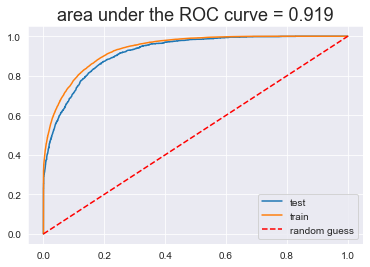

In [62]:
best_features = feature_importance.tail(15).index.values
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train)
get_model_results(model, train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}),  test[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train, y_test)

# plot one of the xgboost trees

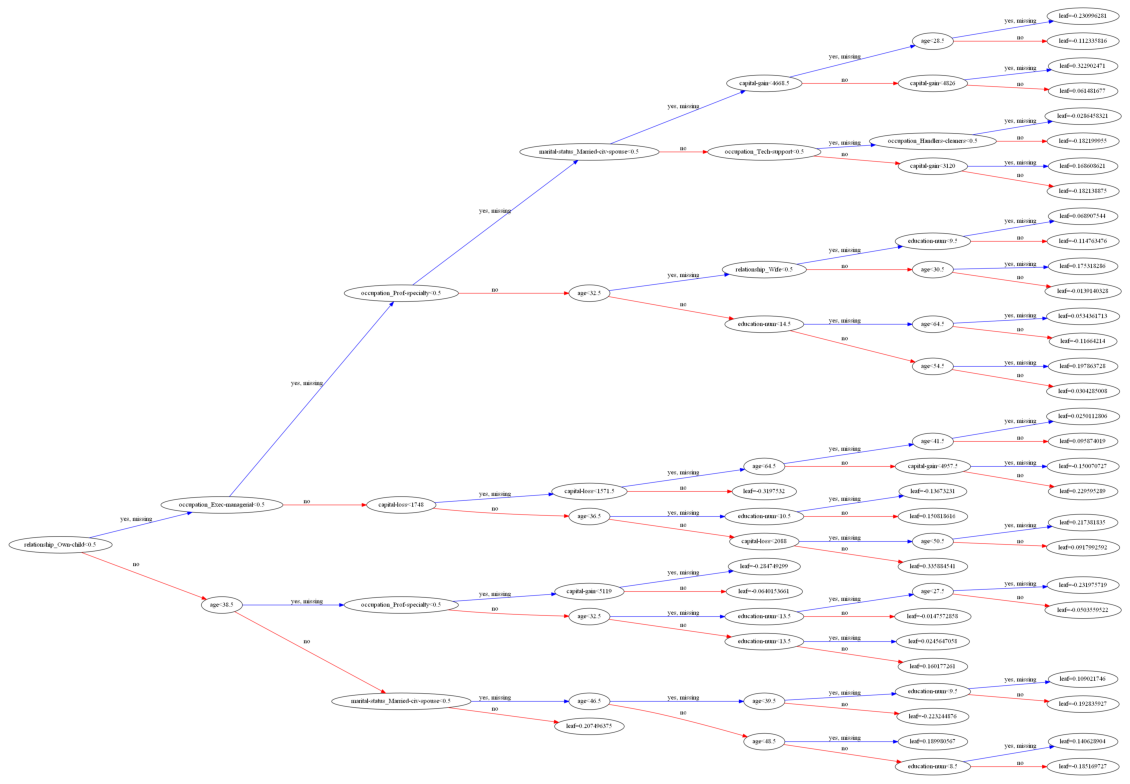

In [73]:
import matplotlib
from xgboost import plot_tree
from matplotlib.pylab import rcParams
ax = plot_tree(model,num_trees=10, rankdir='LR')
fig = ax.figure
fig.set_size_inches(20, 20)




# Visualization of the data with TSNE


Wall time: 30.9 ms


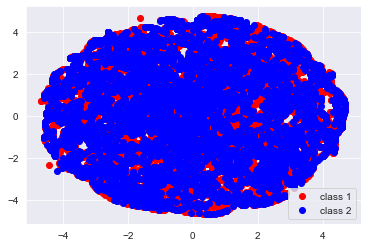

In [74]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE() #n_iter=200)
# train_transformed = tsne.fit_transform(train[best_features])
# pd.DataFrame(train_transformed).to_pickle("train_transformed.pkl")
train_transformed = pd.read_pickle("train_transformed.pkl").values
plt.scatter(train_transformed[(y_train==0).values,0], train_transformed[(y_train==0).values,1], color='r', label='class 1')
plt.scatter(train_transformed[(y_train==1).values,0], train_transformed[(y_train==1).values,1], color='b', label='class 2')
plt.legend()

# Bonus: try encoding the variables based on conditional distribution P(y=1 / x=xi)

In [75]:
def encode_column_by_frequency(train, test, col, log=True):
    country_by_target = train.groupby(col)['target'].value_counts().unstack().fillna(0)
    if log:
        country_probability = np.log((country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5))
    else:
        country_probability = (country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5)
    for val in test[col].unique():    
        if val in country_probability.index.values: 
            continue
        country_probability[val] = country_probability.median()
    train[col] = train[col].map(country_probability)
    test[col] = test[col].map(country_probability)
    return train, test

def encode_numeric_column_by_frequency(train, test, col, log=True, plot_flag=False, window_size=3):
    country_by_target = train.groupby(col)['target'].value_counts().unstack().fillna(0)
    if log:
        country_probability = np.log((country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5))
    else:
        country_probability = (country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5)
    values = np.unique(train[col].unique().tolist()+test[col].unique().tolist())
    resolution = min(1,np.min(np.diff(values)))
    start = np.min(country_probability.index.unique().tolist())
    end = np.max(country_probability.index.unique().tolist())
    country_probability = pd.merge(pd.DataFrame(country_probability),
                                   pd.DataFrame(index=np.arange(start, end+resolution, resolution)),
                                   left_index=True, right_index=True, how='outer').interpolate(method='linear')
    if plot_flag:
        plt.figure()
        country_probability[0].plot(marker='o')
    country_probability=((country_probability[0].cumsum() - country_probability[0].shift(window_size).cumsum())/window_size).shift(-1).fillna(0)
    if plot_flag:
        country_probability.plot()
        plt.title(col)
    train[col] = train[col].map(country_probability)
    test[col] = test[col].map(country_probability)
    return train, test

In [76]:
def get_data_with_encoded_fetures(plot_flag=False):
    df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)#.drop('fnlwgt', axis=1)
    categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']
    columns_to_encode_with_frequencies=categorical_columns
    for col in categorical_columns:
        df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]
    features = [x for x in df if x != 'target']
    X = df[features]
    y = df.target==">50K"
    skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
    train_index, test_index = list(skf.split(X, y))[0]
    train, test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for col in categorical_columns:
        train, test = encode_column_by_frequency(train, test, col, log=False)
    for col in numerical_columns: 
        if col=='fnlwgt': continue
        train, test = encode_numeric_column_by_frequency(train, test, col,log=False, plot_flag=plot_flag)
    train=train.drop('target',axis=1)
    test=test.drop('target',axis=1)
    return train, test, y_train, y_test

# Logistic regression with features replaced with conditional probabilities

C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

              precision    recall  f1-score   support

       False       0.94      0.82      0.88      4944
        True       0.59      0.84      0.70      1569

    accuracy                           0.82      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.82      0.83      6513



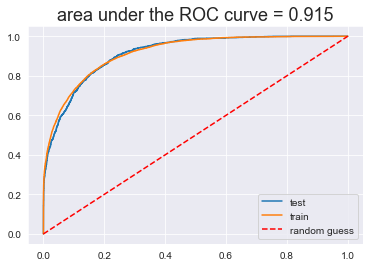

In [77]:
train, test, y_train, y_test = get_data_with_encoded_fetures(plot_flag=False)
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test )


# Logistic regression with features replaced with conditional probabilities + Polynomial features


C:\1\Anaconda3\envs\PythonV3.6.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

       False       0.95      0.81      0.87      4944
        True       0.59      0.87      0.70      1569

    accuracy                           0.82      6513
   macro avg       0.77      0.84      0.79      6513
weighted avg       0.86      0.82      0.83      6513



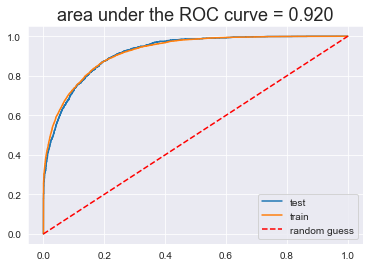

In [78]:
model = make_pipeline(PolynomialFeatures(), MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# XGBOOST  with features replaced with conditional probabilities


              precision    recall  f1-score   support

       False       0.95      0.83      0.88      4944
        True       0.61      0.86      0.72      1569

    accuracy                           0.84      6513
   macro avg       0.78      0.84      0.80      6513
weighted avg       0.87      0.84      0.84      6513



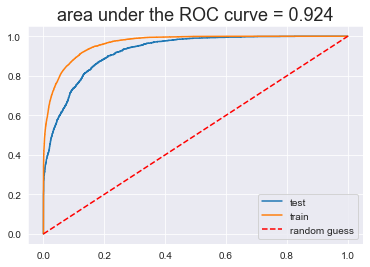

In [79]:
model = XGBClassifier()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# XGBOOST with features replaced with conditional probabilities + Polynomial features


              precision    recall  f1-score   support

       False       0.94      0.83      0.88      4944
        True       0.61      0.84      0.71      1569

    accuracy                           0.83      6513
   macro avg       0.78      0.84      0.80      6513
weighted avg       0.86      0.83      0.84      6513



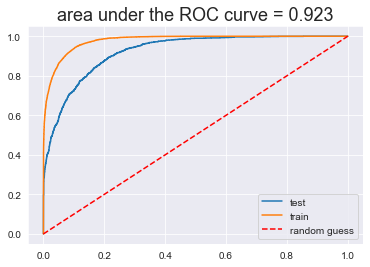

In [81]:
model = make_pipeline(PolynomialFeatures(), XGBClassifier())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# What's next?
- Undetstand which further cool features are missing - use different transformations on the features, use combinations of features, find more data sources which could help to the problem...
- Analyze your model errors and feature importance
- Use tools like LIME to understand your model decisions and errors
- Further tuning of the model - model selection, ensembling and stacking models, hyper-parameters tuning
- Present the results in a clear way according to the relevant business metrics


# Questions?

<img src='meme1.jpg' width="300">

For additional questions - you're welcome to stay in touch - meir.shir86@gmail.com